# Modeling exercise

## General Instructions

* Submission date: 4.5.2023
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1GNPESGIhJpPb7LwMAyjF5qpJfZQak_mLkE3i5Y7a_VA/edit?usp=sharing).

In [2]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import sys; sys.path.append('../src')
import numpy as np
import plotly_express as px

In [4]:
import pandas as pd
import ipywidgets as widgets

In [5]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [6]:
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

In [8]:
print(X)

[[ 0.96479937 -0.06644898  0.98676805 ... -1.2101605  -0.62807677
   1.22727382]
 [-0.91651053 -0.56639459 -1.00861409 ... -0.98453405  0.36389642
   0.20947008]
 [-0.10948373 -0.43277388 -0.4576493  ... -0.2463834  -1.05814521
  -0.29737608]
 ...
 [ 1.67463306  1.75493307  1.58615382 ...  0.69272276 -1.50384972
   0.22526412]
 [-0.77860873 -0.83568901 -0.19484228 ... -0.49735437  2.47213818
   0.86718741]
 [ 0.24845351 -1.0034389   0.36046013 ...  0.77323999  0.1857344
   1.41641179]]


In [9]:
from sklearn.datasets import make_moons

In [10]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [11]:
print(X)

[[-0.17186341  0.59624885]
 [ 1.25328273 -0.26541353]
 [ 0.72322405  0.2319425 ]
 ...
 [ 1.77095705 -0.50943619]
 [-1.06177158  0.006786  ]
 [ 0.76117231  0.65196041]]


In [12]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

,x,y,label
0,0.662339,0.851646,A
1,-0.915320,0.372132,A
2,0.315070,0.803287,A
3,-0.073653,0.022498,B
4,0.426019,-0.238905,B


In [13]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [14]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,0.376563,-0.705833,B
1,0.910106,-0.414376,A
2,0.797727,0.060261,B
3,0.332820,-0.942991,A
4,0.763892,0.237633,B


In [15]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [17]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:

Your 

You experiment code should look something like that:

# answer

In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons,make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def generate_data(n, noise_level, ds_name):
    if ds_name == "moons":
        X, y = make_moons(n_samples=n, noise=noise_level, random_state=42)
    elif ds_name == "circles":  
        X, y = make_circles(n_samples=n, noise=noise_level, random_state=42)
    else:
        print("Invalid dataset name")
        return None
    return X, y



def split_data(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val


def optimize_model(X_train, y_train, X_val, y_val, clf_name):
    if clf_name == 'svm':
        param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
        clf = SVC(kernel='rbf')
    elif clf_name == 'logistic':
        param_grid = {'C': [0.1, 1, 10]}
        clf = LogisticRegression()
    elif clf_name == 'randomforest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
        clf = RandomForestClassifier()  

    else:
        print("Invalid classifier name")
        return None
    
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_clf = grid_search.best_estimator_
    
    tre = accuracy_score(y_train, best_clf.predict(X_train))
    teste = accuracy_score(y_val, best_clf.predict(X_val))
    e_diff = abs(tre - teste)
    
    if clf_name == 'svm':
            results = {'DS_NAME': ds, 'N': X_train.shape[0], 'NL': nl,
               'CLF_NAME': clf_name, 'K': 'rbf', 'TRE': tre, 'TESTE': teste, 'E_DIFF': e_diff,
               'Hyper_Parameters': str(best_params)}
    else:
        results = {'DS_NAME': ds, 'N': X_train.shape[0], 'NL': nl,
               'CLF_NAME': clf_name, 'K': '-', 'TRE': tre, 'TESTE': teste, 'E_DIFF': e_diff,
               'Hyper_Parameters': str(best_params)}
        
        

    
    return results


# loop over different noise levels and sample sizes
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
sample_sizes = [100, 500, 1000,10000]
ds_names=['moons','circles']
results = []
clf_names=['svm','logistic','randomforest']

for ds in ds_names:
    for nl in noise_levels:
        for n in sample_sizes:
            X, y = generate_data(n, nl,ds)
            X_train, X_val, y_train, y_val = split_data(X, y)
            
            for clf_name in clf_names:
                clf_results = optimize_model(X_train, y_train, X_val, y_val, clf_name)
                results.append(clf_results)


# save results as a pandas dataframe
df = pd.DataFrame(results)
df_sorted = df.sort_values(by=['E_DIFF', 'TESTE'], ascending=True)
df_sorted.to_csv('results.csv', index=False)


# For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?

In [62]:
df_filtered = df[(df['N'] == 8000) & (df['CLF_NAME'] == 'svm')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)


In [63]:
df_filtered.head(100)

,DS_NAME,N,NL,CLF_NAME,K,TRE,TESTE,E_DIFF,Hyper_Parameters
9,moons,8000,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
81,circles,8000,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
21,moons,8000,0.1,svm,rbf,0.999500,0.9985,0.001000,"{'C': 1, 'gamma': 10}"
33,moons,8000,0.2,svm,rbf,0.973125,0.9760,0.002875,"{'C': 10, 'gamma': 1}"
57,moons,8000,0.4,svm,rbf,0.865625,0.8685,0.002875,"{'C': 1, 'gamma': 10}"
93,circles,8000,0.1,svm,rbf,0.837625,0.8310,0.006625,"{'C': 1, 'gamma': 0.1}"
69,moons,8000,0.5,svm,rbf,0.821125,0.8285,0.007375,"{'C': 10, 'gamma': 0.1}"
45,moons,8000,0.3,svm,rbf,0.918375,0.9270,0.008625,"{'C': 1, 'gamma': 1}"
129,circles,8000,0.4,svm,rbf,0.594125,0.5785,0.015625,"{'C': 0.1, 'gamma': 1}"
141,circles,8000,0.5,svm,rbf,0.575250,0.5585,0.016750,"{'C': 10, 'gamma': 0.1}"


In [29]:

# Filter for SVM only and dataset size of 10k
df_filtered = df[(df['N'] == 8000) & (df['CLF_NAME'] == 'svm')]

# Sort by E_DIFF and TESTE columns in ascending order
df_sorted = df_filtered.sort_values(by=['E_DIFF', 'TESTE'], ascending=True)

# Select the most stable model and its hyperparameters
most_stable_model = df_sorted.iloc[0]
print("Most stable model and hyperparameters: \n", most_stable_model['Hyper_Parameters'])

# Print the accuracy of the most stable model on the validation set
print("Validation accuracy of the most stable model: ", most_stable_model['TESTE'])


Most stable model and hyperparameters: 
 {'C': 0.1, 'gamma': 1}
Validation accuracy of the most stable model:  1.0


# For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.

In [47]:
df_filtered = df_sorted[(df_sorted['N'] == 8000) & (df_sorted['CLF_NAME'] == 'svm') & (df_sorted['CLF_NAME'] == 'logistic')]
df_grouped = df_filtered.groupby(['DS_NAME']).first()


In [53]:
df_sorted

,DS_NAME,N,NL,CLF_NAME,K,TRE,TESTE,E_DIFF,Hyper_Parameters
9,moons,8000,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
81,circles,8000,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
21,moons,8000,0.1,svm,rbf,0.999500,0.9985,0.001000,"{'C': 1, 'gamma': 10}"
33,moons,8000,0.2,svm,rbf,0.973125,0.9760,0.002875,"{'C': 10, 'gamma': 1}"
57,moons,8000,0.4,svm,rbf,0.865625,0.8685,0.002875,"{'C': 1, 'gamma': 10}"
93,circles,8000,0.1,svm,rbf,0.837625,0.8310,0.006625,"{'C': 1, 'gamma': 0.1}"
69,moons,8000,0.5,svm,rbf,0.821125,0.8285,0.007375,"{'C': 10, 'gamma': 0.1}"
45,moons,8000,0.3,svm,rbf,0.918375,0.9270,0.008625,"{'C': 1, 'gamma': 1}"
129,circles,8000,0.4,svm,rbf,0.594125,0.5785,0.015625,"{'C': 0.1, 'gamma': 1}"
141,circles,8000,0.5,svm,rbf,0.575250,0.5585,0.016750,"{'C': 10, 'gamma': 0.1}"


In [60]:
df_sorted = df.sort_values(by=['E_DIFF', 'TESTE'], ascending=True)

In [77]:
df = pd.DataFrame(results)
df_sorted = df.sort_values(by=['E_DIFF', 'TESTE'], ascending=True)
df_sorted.to_csv('results.csv', index=False)

In [78]:
result_excel=df_sorted.to_excel('output.xlsx', index=False)

# Does regularization help for linear models? consider different datasets sizes

In [64]:
df_filtered = df[ (df['CLF_NAME'] == 'logistic')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)


In [67]:
df_filtered.head(8)

,DS_NAME,N,NL,CLF_NAME,K,TRE,TESTE,E_DIFF,Hyper_Parameters
28,moons,400,0.2,logistic,-,0.860000,0.860,0.000000,{'C': 10}
40,moons,400,0.3,logistic,-,0.847500,0.850,0.002500,{'C': 1}
67,moons,800,0.5,logistic,-,0.808750,0.805,0.003750,{'C': 10}
127,circles,800,0.4,logistic,-,0.521250,0.525,0.003750,{'C': 0.1}
52,moons,400,0.4,logistic,-,0.835000,0.830,0.005000,{'C': 1}
19,moons,800,0.1,logistic,-,0.877500,0.870,0.007500,{'C': 10}
70,moons,8000,0.5,logistic,-,0.806125,0.814,0.007875,{'C': 0.1}
82,circles,8000,0.0,logistic,-,0.520375,0.512,0.008375,{'C': 0.1}


# For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)

In [71]:
df_filtered = df[ (df['CLF_NAME'] == 'svm') & (df['DS_NAME'] =='moons')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)

In [72]:
df_filtered

,DS_NAME,N,NL,CLF_NAME,K,TRE,TESTE,E_DIFF,Hyper_Parameters
0,moons,80,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 1}"
3,moons,400,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 10}"
6,moons,800,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
9,moons,8000,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
12,moons,80,0.1,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 10}"
15,moons,400,0.1,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 10}"
18,moons,800,0.1,svm,rbf,1.000000,1.0000,0.000000,"{'C': 10, 'gamma': 1}"
21,moons,8000,0.1,svm,rbf,0.999500,0.9985,0.001000,"{'C': 1, 'gamma': 10}"
33,moons,8000,0.2,svm,rbf,0.973125,0.9760,0.002875,"{'C': 10, 'gamma': 1}"
57,moons,8000,0.4,svm,rbf,0.865625,0.8685,0.002875,"{'C': 1, 'gamma': 10}"


In [73]:
df_filtered = df[ (df['CLF_NAME'] == 'svm') & (df['DS_NAME'] =='circles')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)

In [74]:
df_filtered

,DS_NAME,N,NL,CLF_NAME,K,TRE,TESTE,E_DIFF,Hyper_Parameters
72,circles,80,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 10}"
75,circles,400,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 1}"
78,circles,800,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 10}"
81,circles,8000,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
93,circles,8000,0.1,svm,rbf,0.837625,0.8310,0.006625,"{'C': 1, 'gamma': 0.1}"
84,circles,80,0.1,svm,rbf,0.837500,0.8500,0.012500,"{'C': 10, 'gamma': 1}"
129,circles,8000,0.4,svm,rbf,0.594125,0.5785,0.015625,"{'C': 0.1, 'gamma': 1}"
141,circles,8000,0.5,svm,rbf,0.575250,0.5585,0.016750,"{'C': 10, 'gamma': 0.1}"
117,circles,8000,0.3,svm,rbf,0.629625,0.6125,0.017125,"{'C': 10, 'gamma': 1}"
99,circles,400,0.2,svm,rbf,0.667500,0.6500,0.017500,"{'C': 10, 'gamma': 0.1}"


In [75]:
df_filtered = df[ (df['CLF_NAME'] == 'logistic') & (df['DS_NAME'] =='moons')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)

In [76]:
df_filtered

,DS_NAME,N,NL,CLF_NAME,K,TRE,TESTE,E_DIFF,Hyper_Parameters
28,moons,400,0.2,logistic,-,0.860000,0.8600,0.000000,{'C': 10}
40,moons,400,0.3,logistic,-,0.847500,0.8500,0.002500,{'C': 1}
67,moons,800,0.5,logistic,-,0.808750,0.8050,0.003750,{'C': 10}
52,moons,400,0.4,logistic,-,0.835000,0.8300,0.005000,{'C': 1}
19,moons,800,0.1,logistic,-,0.877500,0.8700,0.007500,{'C': 10}
70,moons,8000,0.5,logistic,-,0.806125,0.8140,0.007875,{'C': 0.1}
64,moons,400,0.5,logistic,-,0.830000,0.8200,0.010000,{'C': 10}
31,moons,800,0.2,logistic,-,0.870000,0.8600,0.010000,{'C': 10}
7,moons,800,0.0,logistic,-,0.888750,0.9000,0.011250,{'C': 10}
58,moons,8000,0.4,logistic,-,0.829750,0.8415,0.011750,{'C': 1}


Best parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Training accuracy:  0.6889285714285714
Test accuracy:  0.6804166666666667


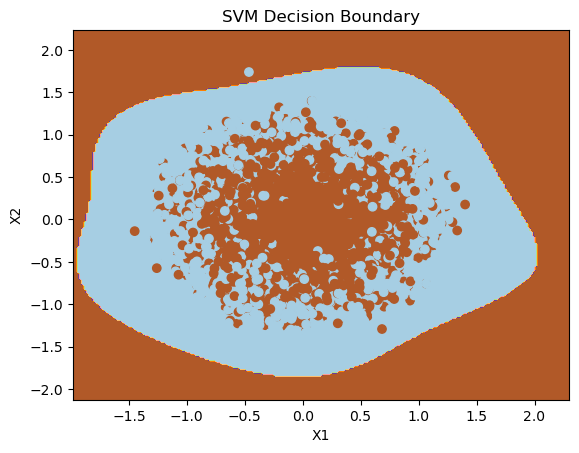

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
#make_moons
# Generate dataset
X, y = make_circles(n_samples=8000, noise=0.2, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

# Initialize SVM classifier
svm = SVC()

# Perform grid search to find optimal parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Training accuracy: ", grid_search.best_score_)
print("Test accuracy: ", grid_search.score(X_test, y_test))

# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary')
plt.show()


Best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Training accuracy:  0.9723214285714284
Test accuracy:  0.9754166666666667


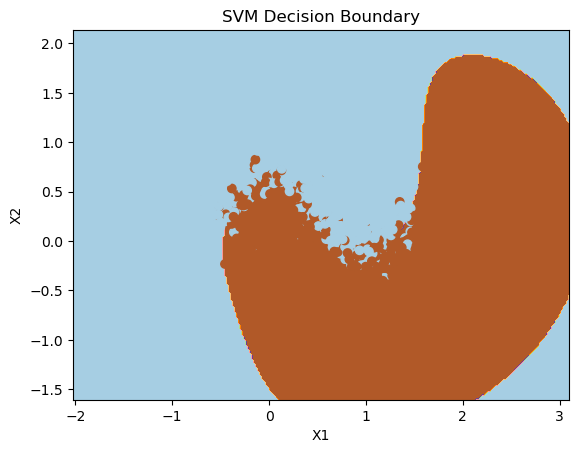

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
#make_moons
# Generate dataset
X, y = make_moons(n_samples=8000, noise=0.2, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

# Initialize SVM classifier
svm = SVC()

# Perform grid search to find optimal parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Training accuracy: ", grid_search.best_score_)
print("Test accuracy: ", grid_search.score(X_test, y_test))

# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary')
plt.show()


Best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Training accuracy:  0.9857142857142858
Test accuracy:  0.9583333333333334


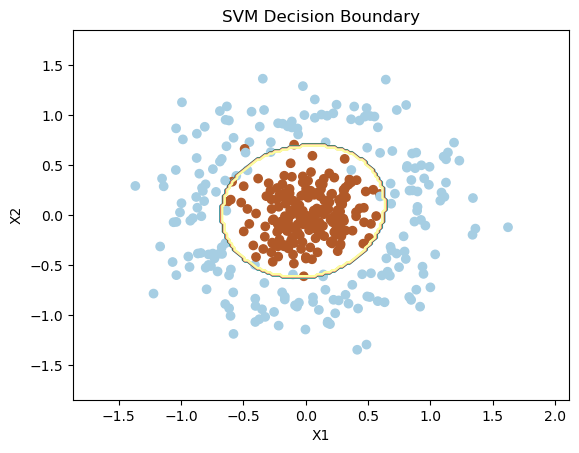

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

# Generate dataset
X, y = make_circles(n_samples=400, noise=0.2, factor=0.2,random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

# Initialize SVM classifier
svm = SVC()

# Perform grid search to find optimal parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Training accuracy: ", grid_search.best_score_)
print("Test accuracy: ", grid_search.score(X_test, y_test))

# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary')
plt.show()
